In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from scipy.stats import skew, kurtosis
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks, savgol_filter 
from scipy.ndimage import uniform_filter1d
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error
from numpy.polynomial.chebyshev import chebvander
from sklearn.model_selection import KFold




from astropy.stats import median_absolute_deviation as MAD


In [2]:
# #plots layout
from matplotlib import rc
# from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.font_manager
import matplotlib.colors as colors


plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18


SMALL_SIZE = 15
MEDIUM_SIZE = 17
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


In [3]:
folder = "Data/Data_cleaned"  # path for folder
files = glob.glob(os.path.join(folder, "*.csv"))

# Dictionary to store each instrument's data
dataframe_clean = {}
labels = []

for file in files:
    # Get file base name without extension (e.g., camera, radio)
    label = os.path.splitext(os.path.basename(file))[0]
    labels.append(label)

    
    # Load CSV into a DataFrame
    df = pd.read_csv(file)
    
    #drop any row with missing values in this file only
    df = df.dropna().reset_index(drop=True)


    # # Store in the dictionary
    dataframe_clean[label] = df

dataframe_clean

{'Kiricom_Radio_On_MAX_100kHz_EIRP':        Unnamed: 0  Frequency (MHz)  Clean_EIRP(dBm)
 0               0          80.0925       -59.478259
 1               1          80.1850       -61.157473
 2               2          80.2775       -61.318212
 3               3          80.3700       -60.994273
 4               4          80.4625       -61.422765
 ...           ...              ...              ...
 12797       21291        2049.5100       -87.196076
 12798       21292        2049.6025       -84.371832
 12799       21294        2049.7875       -86.330525
 12800       21295        2049.8800       -94.942077
 12801       21296        2049.9725       -92.431921
 
 [12802 rows x 3 columns],
 'Superfire_HL58_Headlamp_100kHz_EIRP':        Unnamed: 0  Frequency (MHz)  Clean_EIRP(dBm)
 0               1          80.0925      -105.448569
 1               2          80.1850      -129.491156
 2               5          80.4625       -98.770357
 3               6          80.5550       -93.65

/tmp/ipykernel_7053/3732874450.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


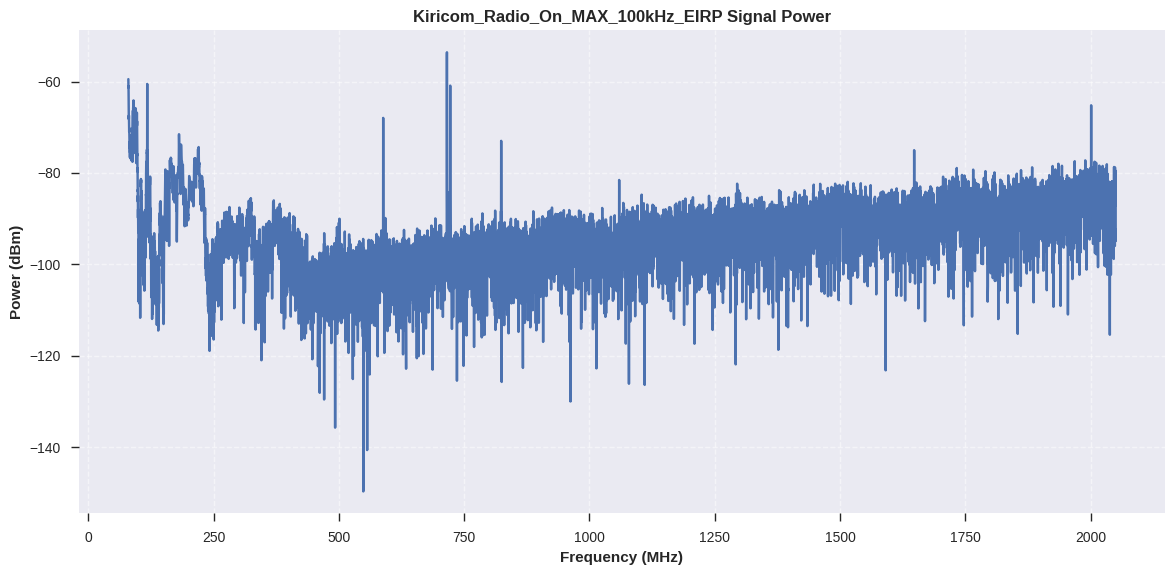

/tmp/ipykernel_7053/3732874450.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


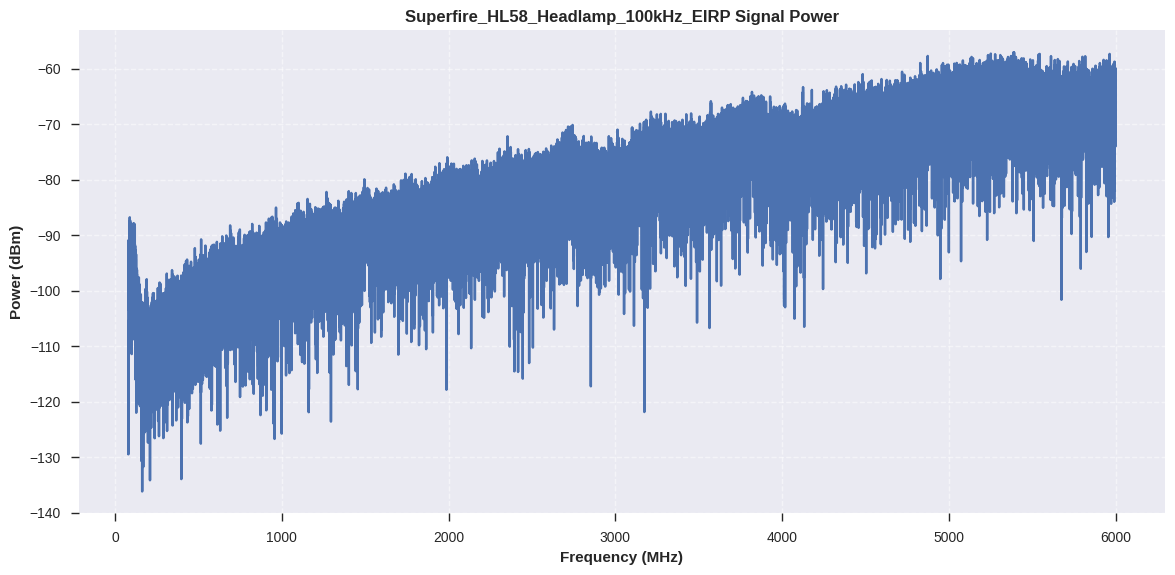

/tmp/ipykernel_7053/3732874450.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


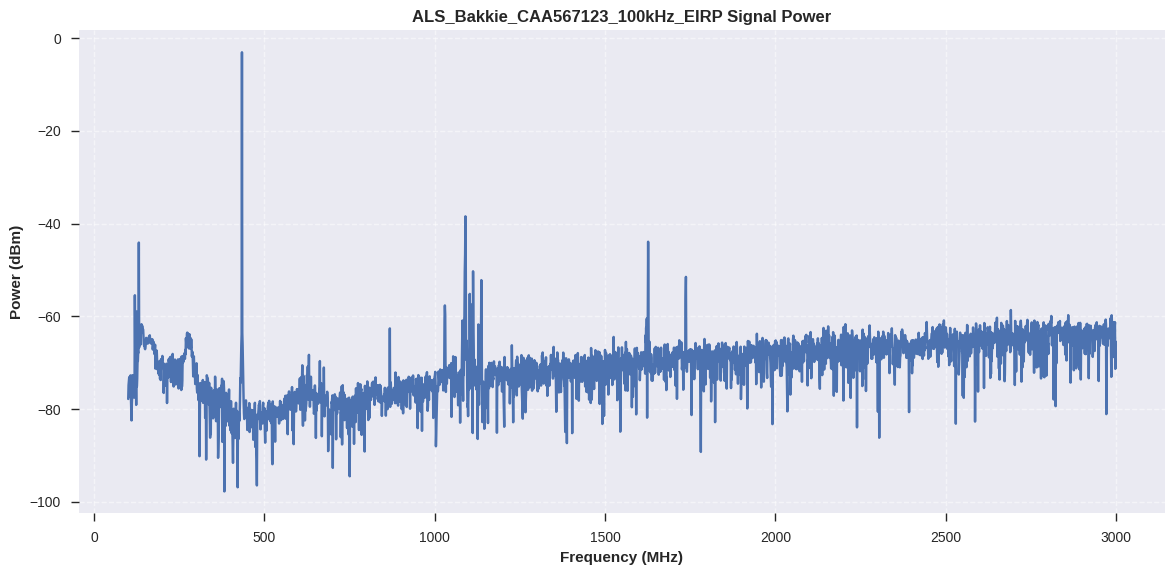

/tmp/ipykernel_7053/3732874450.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


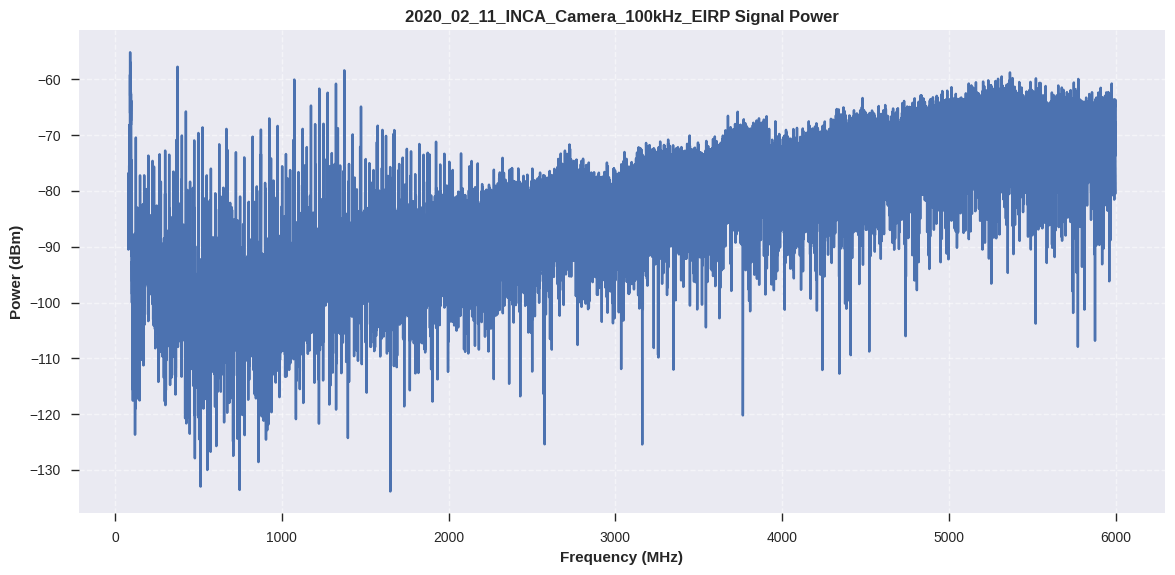

In [4]:

for instrument_name, df in dataframe_clean.items():
    # Plot settings
    plt.style.use('seaborn')
    plt.figure(figsize=(12, 6))

    
    

    # Plot the instrument PSD
    plt.plot(df['Frequency (MHz)'], df['Clean_EIRP(dBm)'])
    

    plt.title(f'{instrument_name} Signal Power', fontweight='bold')
    plt.xlabel('Frequency (MHz)',fontweight='bold')
    plt.ylabel('Power (dBm)', fontweight='bold')
    plt.tick_params(axis='both', which='both', direction='out', length=6, width=1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define the best window legth for Savitzky-Golay filter.


In [5]:
def window_size(signal, windows):
    """
    Analyze different window lengths to use Savitzky-Golay filters.
    
    Parameters:
        signal (array): Signal values to analyze
        
    Returns:
        tuple: (trends, detrended_signals) containing all filtered results
    """
    # Configuration
    polyorder = 3
    
    # Calculate trends and detrended signals
    trends = []
    detrend_signal = []
    
    for w in windows:
        trend = savgol_filter(signal, window_length=w, polyorder=polyorder)
        det = signal - trend
        trends.append(trend)
        detrend_signal.append(det)
    

    return trends, detrend_signal

/tmp/ipykernel_7053/950041888.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


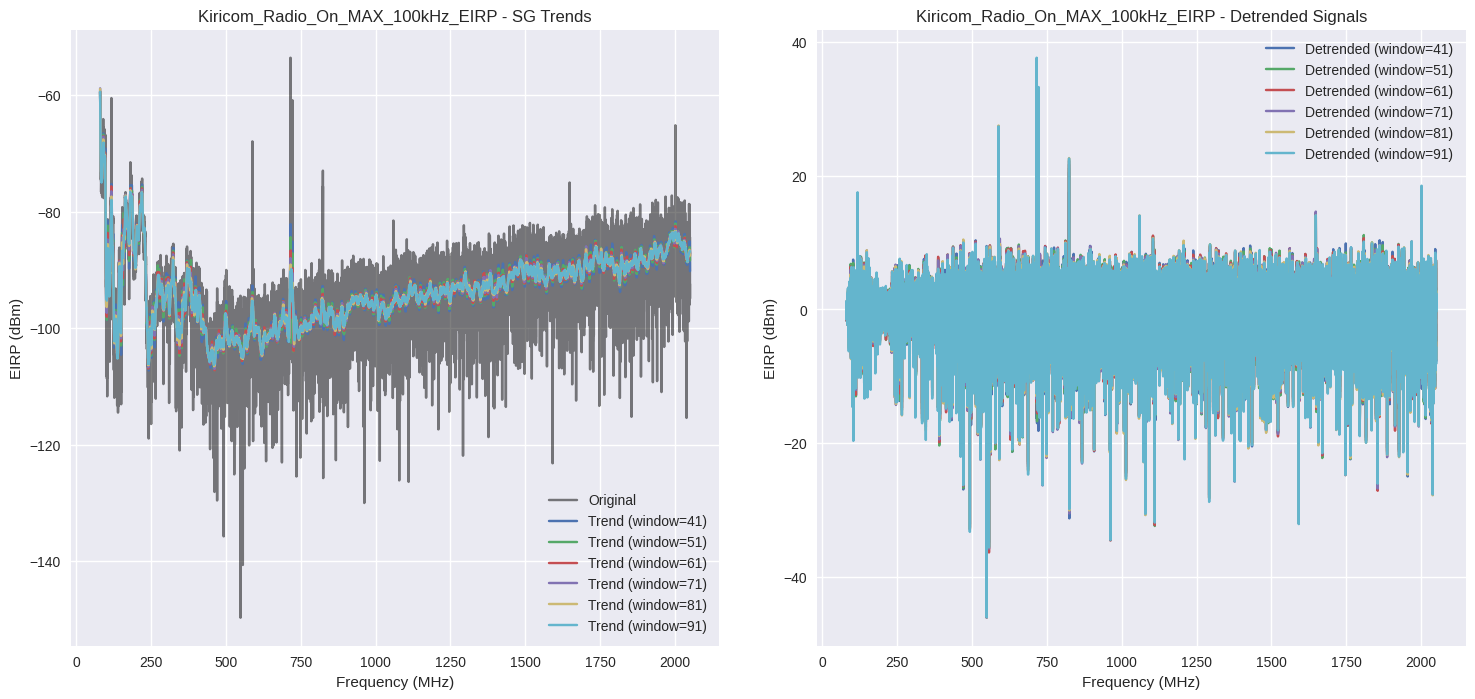

/tmp/ipykernel_7053/950041888.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


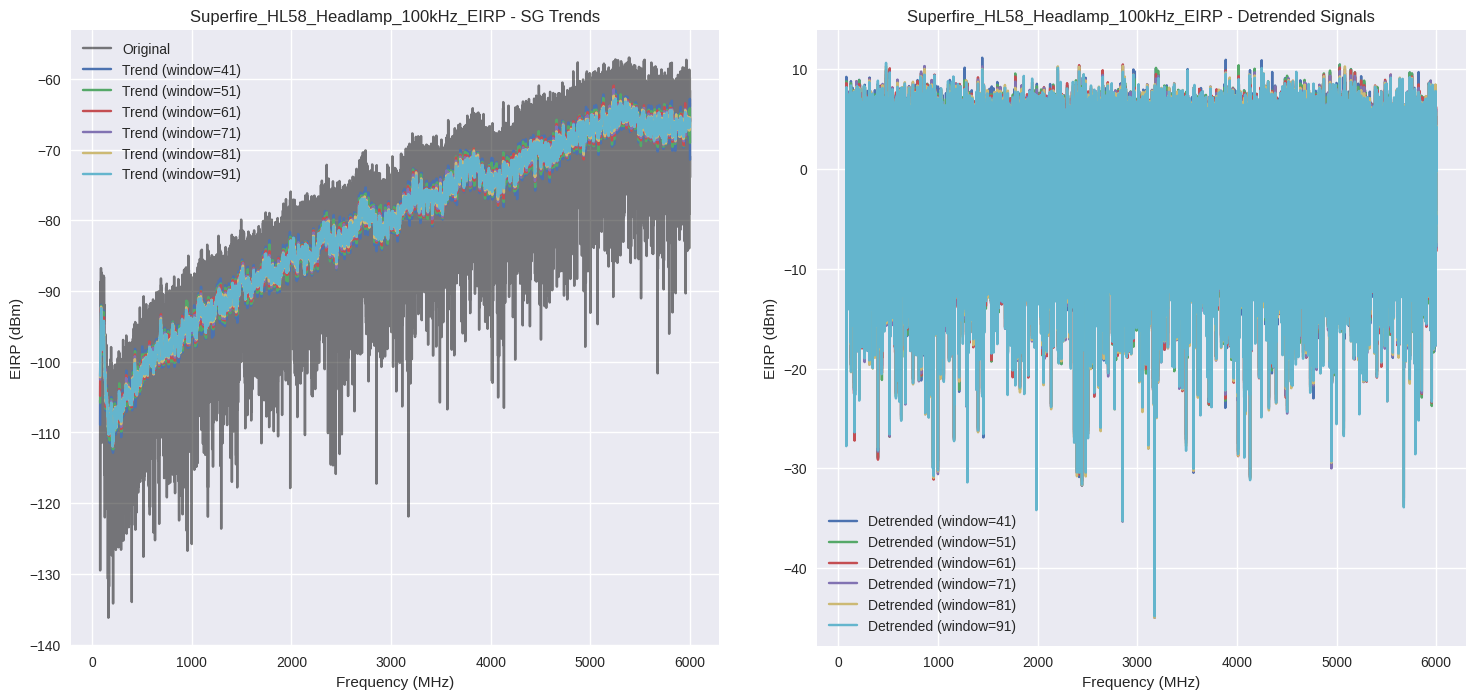

/tmp/ipykernel_7053/950041888.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


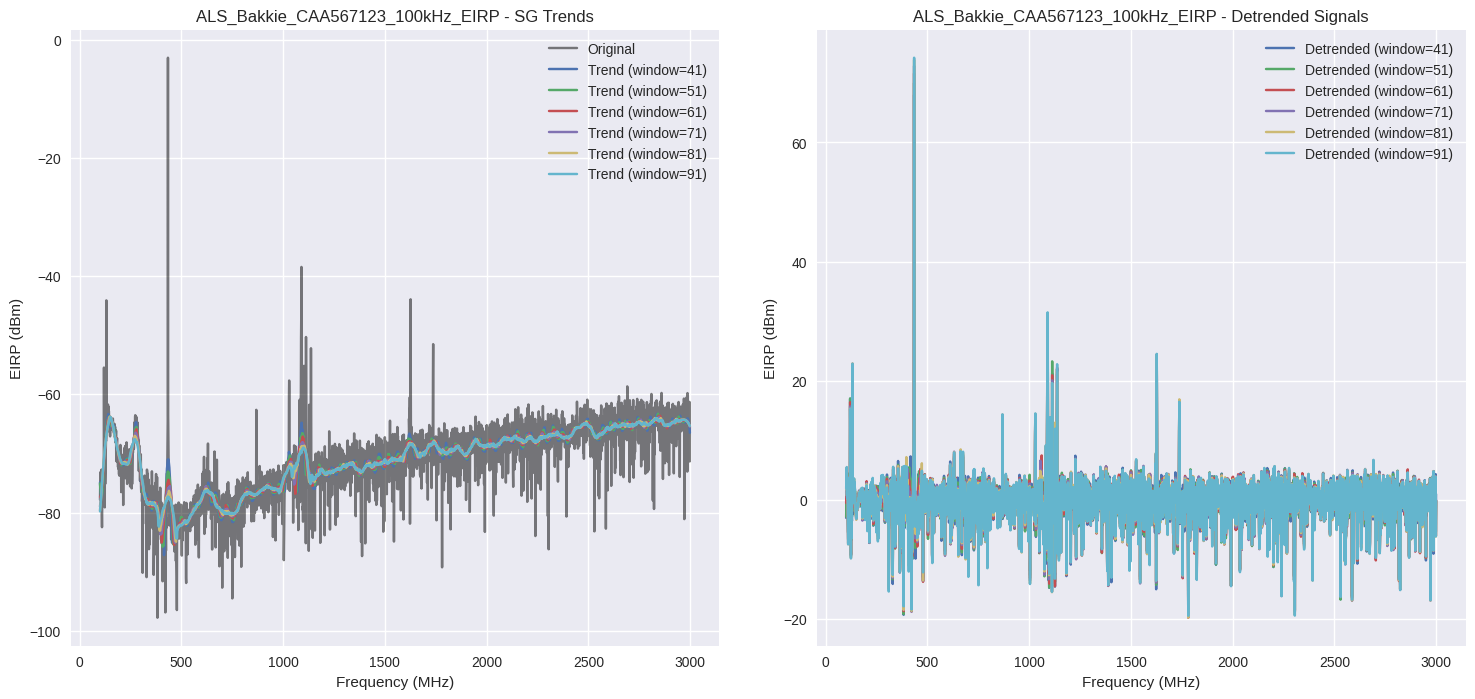

/tmp/ipykernel_7053/950041888.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


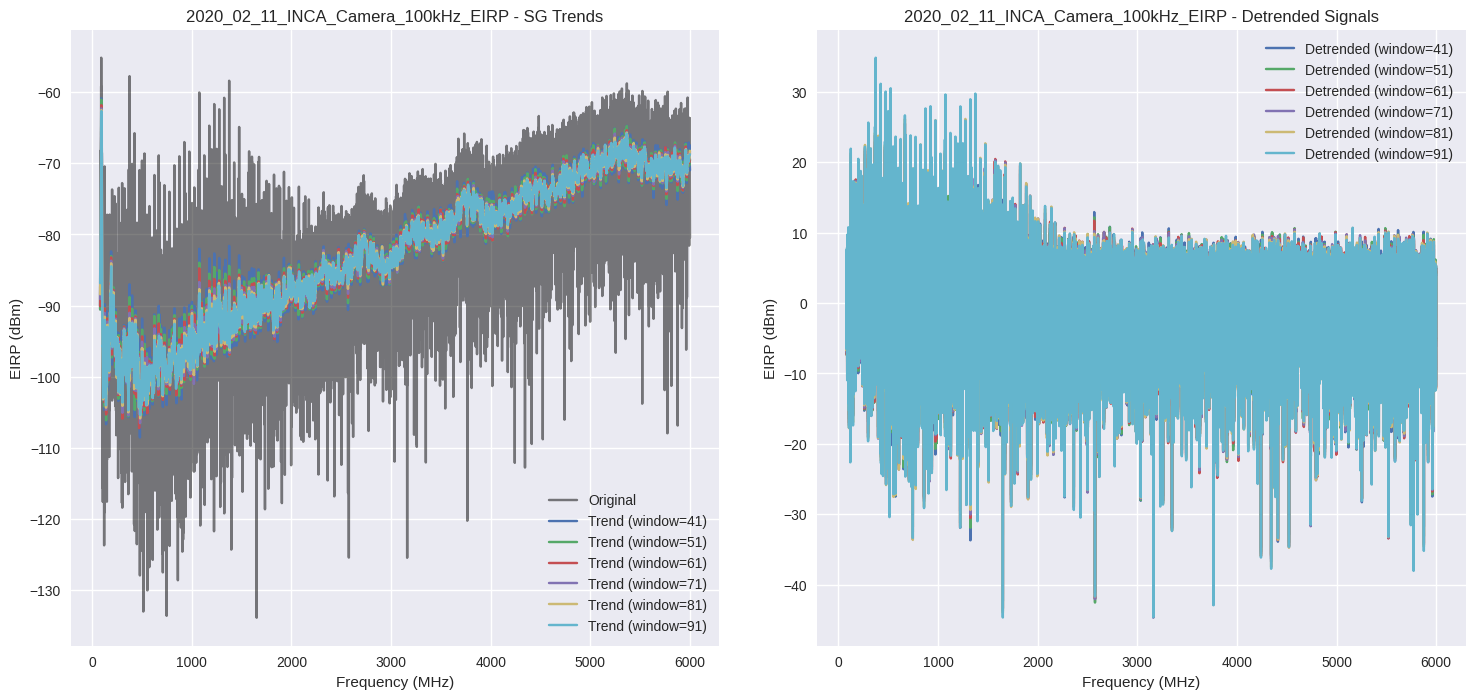

In [6]:
window_sizes = list(range(41,101,10))

for instrument_name, df in dataframe_clean.items():

    # Get the 2D arrays: one row per window size
    trend_sg, detrend_signal_sg = window_size(df['Clean_EIRP(dBm)'], windows=window_sizes)

    plt.style.use('seaborn')
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))
    fig.subplots_adjust(wspace=0.15)

    # Original signal
    axs[0].plot(df['Frequency (MHz)'], df['Clean_EIRP(dBm)'], color='black', alpha=0.5, label='Original')

    # Plot trends and detrended signals for each window size
    for i, w in enumerate(window_sizes):
        axs[0].plot(df['Frequency (MHz)'], trend_sg[i], label=f'Trend (window={w})')
        axs[1].plot(df['Frequency (MHz)'], detrend_signal_sg[i], label=f'Detrended (window={w})')

    axs[0].set_title(f"{instrument_name} - SG Trends")
    axs[1].set_title(f"{instrument_name} - Detrended Signals")
    axs[0].legend()
    axs[1].legend()
    axs[0].set_xlabel("Frequency (MHz)")
    axs[0].set_ylabel("EIRP (dBm)")
    axs[1].set_xlabel("Frequency (MHz)")
    axs[1].set_ylabel("EIRP (dBm)")
    plt.show()

In [7]:
def calculate_bic_sg(signal, window_sizes):
    """
    Calculate BIC values for different window lengths using the Savitzky-Golay filter.

    Parameters:
    - signal: array-like, signal values (e.g., EIRP)
    - max_window: int, maximum window length to test (must be odd)

    Returns:
    - bics_windows: list of BIC values for each window length
    - window_sizes: list of tested window sizes
    """
    
    #window_sizes = int(range(11, max_window, 10))  # Ensure variable name is consistent
    bics_windows = []
    
    n = len(signal)

    for w in window_sizes:
     
        # Apply SG filter
        trend_sg = savgol_filter(signal, window_length=w, polyorder=3)

        # Residual sum of squares
        residuals = signal - trend_sg
        rss = np.sum(residuals ** 2)

        # BIC calculation
        k = w + 1 # Model complexity proxy: window length
        bic = n * np.log(rss / n) + k * np.log(n)


        bics_windows.append(bic)

    return bics_windows, window_sizes 

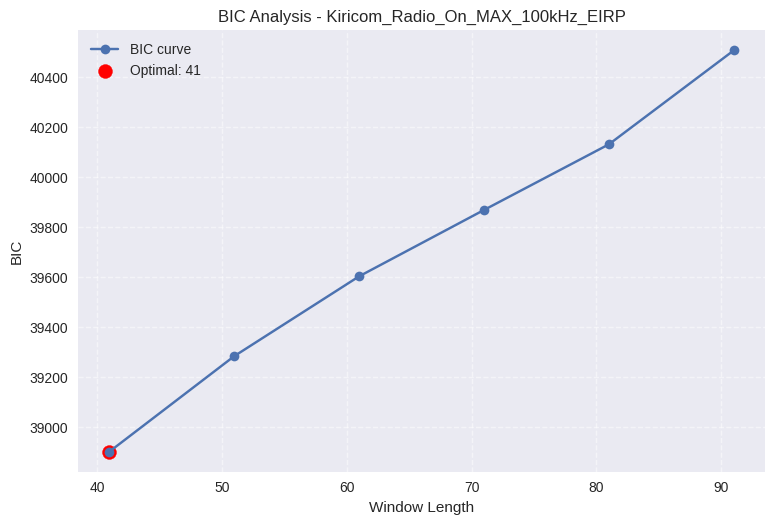

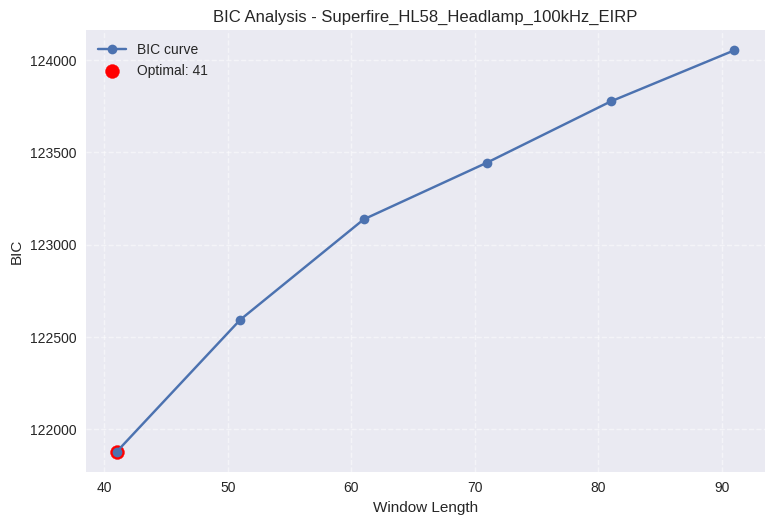

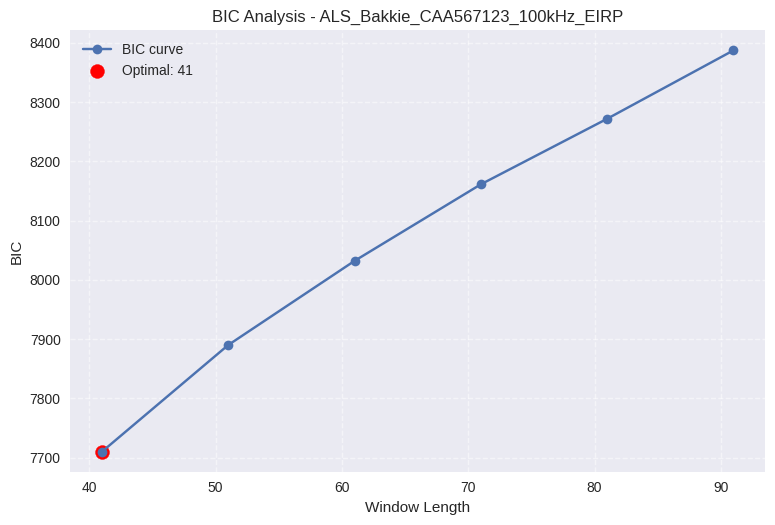

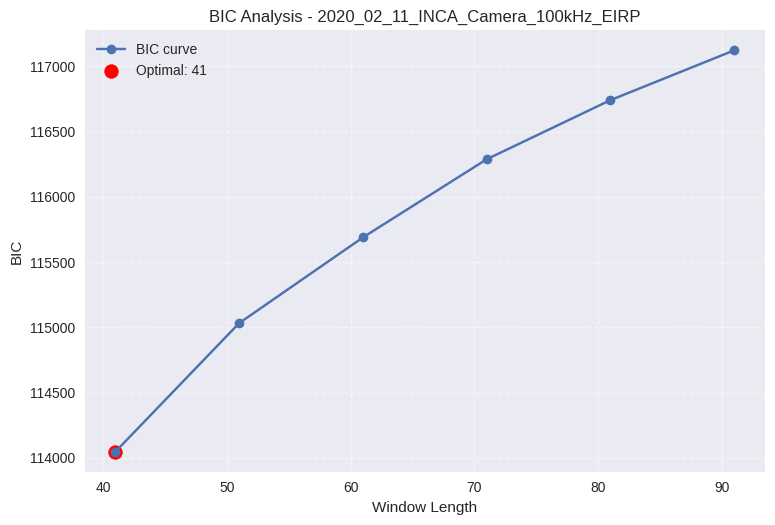

In [8]:
for instrument_name, df in dataframe_clean.items():
    signal = df['Clean_EIRP(dBm)']

    # Step 1: Calculate BIC for all window sizes
    bic_w, wind_s = calculate_bic_sg(signal, window_sizes)

    # Step 2: Find the optimal window size (min BIC)
    optimal_idx = np.argmin(bic_w)
    optimal_window = wind_s[optimal_idx]

    # Step 3: Apply SG filter using optimal window
    trend = savgol_filter(signal, polyorder=3, window_length=optimal_window)
    detrend = signal - trend

    # Step 4: Plot BIC curve
    plt.plot(wind_s, bic_w, marker='o', label='BIC curve')
    plt.scatter(optimal_window, bic_w[optimal_idx], color='red', s=100, label=f'Optimal: {optimal_window}')
    plt.xlabel('Window Length')
    plt.ylabel('BIC')
    plt.title(f'BIC Analysis - {instrument_name}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Minimize the Mean Square Error (MSE)

Optimal window length: 7


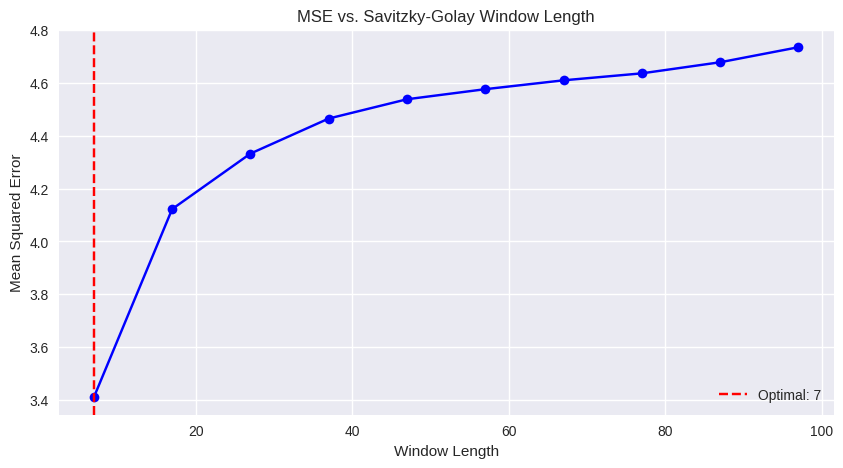

In [9]:
def find_optimal_window(sig_nal, window_range, polyorder=3):
    """
    Find the optimal window length for Savitzky-Golay filter using MSE minimization
    
    Parameters:
    signal (array): Input signal
    window_range (range/list): Range of window sizes to test (must be odd integers)
    polyorder (int): Polynomial order for SG filter
    
    Returns:
    best_window (int): Optimal window length
    mse_values (list): MSE for each window size
    """
    mse_values = []
    rmse_values = []
    std_error_values = []
    
    
    for w in window_range:
        try:
            # Apply SG filter
            filtered = savgol_filter(sig_nal, window_length=w, polyorder=polyorder)
            
            # Calculate MSE between original and filtered signal
            mse = mean_squared_error(sig_nal, filtered)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
            mse_values.append(mse)

            std_error = np.nanstd(sig_nal - filtered)

            std_error_values.append(std_error)
            
        except ValueError:
            # Skip invalid window sizes
            mse_values.append(np.inf)
    
    # Find window with minimum MSE
    best_idx = np.argmin(std_error_values)
    best_window = window_range[best_idx]
    
    return best_window, mse_values, std_error_values

for instrument_name, df in dataframe_clean.items():


    signal = df['Clean_EIRP(dBm)']  # Replace with your signal
    window_range = range(7, 101, 10)  # Odd numbers from 5 to 49

    best_window, mse_values, std_err = find_optimal_window(signal, window_range)

    print(f"Optimal window length: {best_window}")

    plt.figure(figsize=(10, 5))
    plt.plot(window_range, std_err, 'bo-')
    plt.xlabel('Window Length')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs. Savitzky-Golay Window Length')
    plt.axvline(best_window, color='r', linestyle='--', 
            label=f'Optimal: {best_window}')
    plt.grid(True)
    plt.legend()
    plt.show()

    break

In [10]:
def cost_for_window(y, x, window, polyorder):
    y_smooth = savgol_filter(y, window_length=window, polyorder=polyorder)
    # 1) residual noise
    sigma_res = np.nanstd(y - y_smooth)
    # 2) example: feature height at index i_peak
    i_peak = np.argmax(y)  
    feat_err = abs(y_smooth[i_peak] - y[i_peak])
    # combine (tune lambda as needed)
    return sigma_res + 0.5 * feat_err

for instrument_name, df in dataframe_clean.items():
    polyorder = 3
    windows = np.arange(7, 101, 10)  # odd lengths from min to 99
    costs   = [cost_for_window(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]



    best_w = windows[np.argmin(costs)]
    print(f"Optimal window for {instrument_name} is: {best_w}")

Optimal window for Kiricom_Radio_On_MAX_100kHz_EIRP is: 7
Optimal window for Superfire_HL58_Headlamp_100kHz_EIRP is: 7
Optimal window for ALS_Bakkie_CAA567123_100kHz_EIRP is: 7
Optimal window for 2020_02_11_INCA_Camera_100kHz_EIRP is: 7


## `Cross validation`

-- To choose the best window size for a Savitzky-Golay filter, the GOAL: To find the best window size (window) that balances smoothing and preserving the signal, using `K-fold` cross-validation on your data.

CV‐optimal window for Kiricom_Radio_On_MAX_100kHz_EIRP is: 21
CV‐optimal window for Superfire_HL58_Headlamp_100kHz_EIRP is: 91
CV‐optimal window for ALS_Bakkie_CAA567123_100kHz_EIRP is: 11
CV‐optimal window for 2020_02_11_INCA_Camera_100kHz_EIRP is: 41


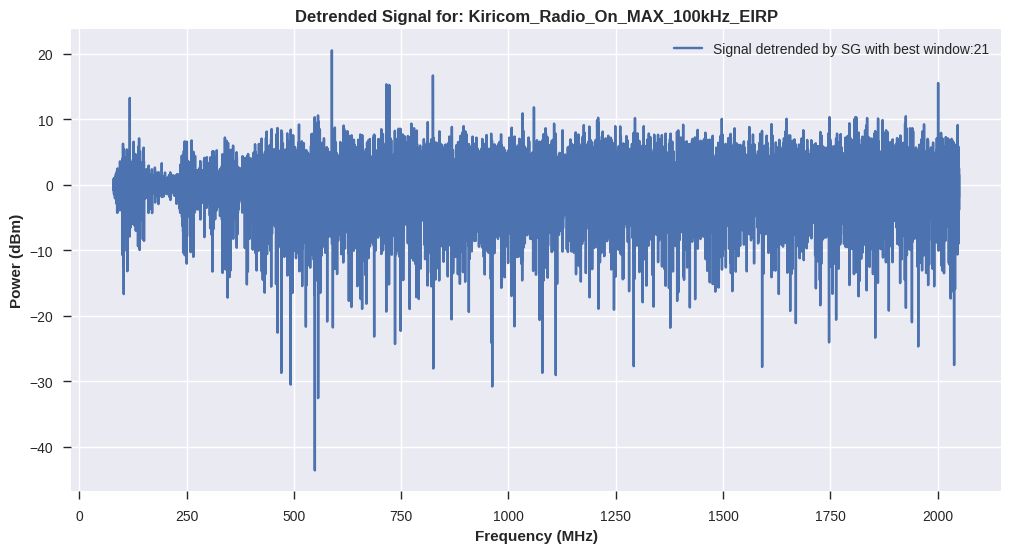

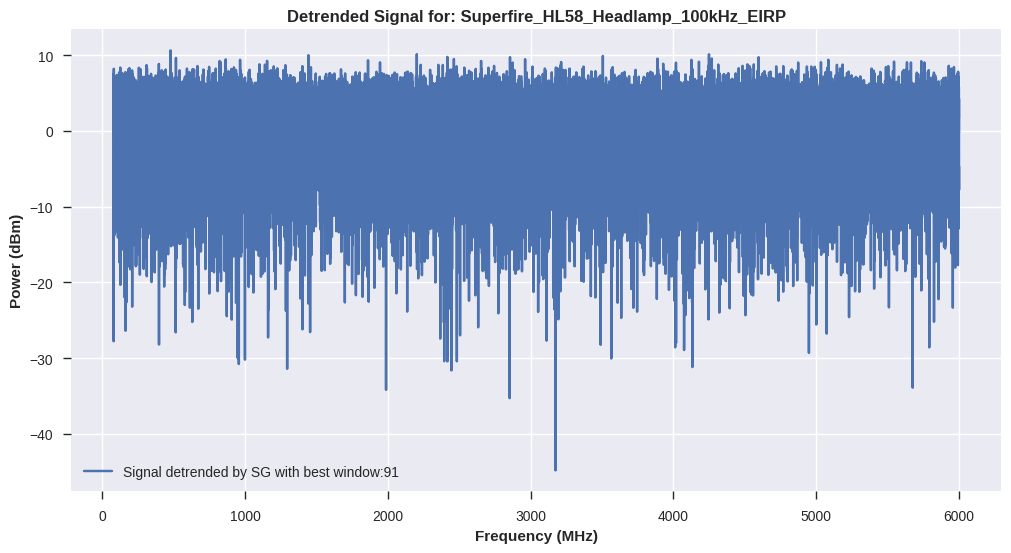

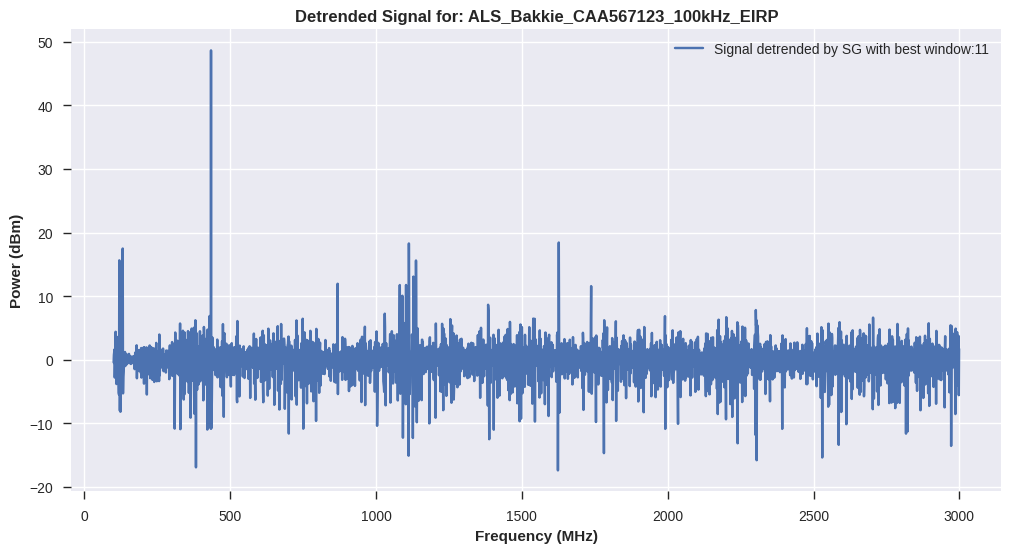

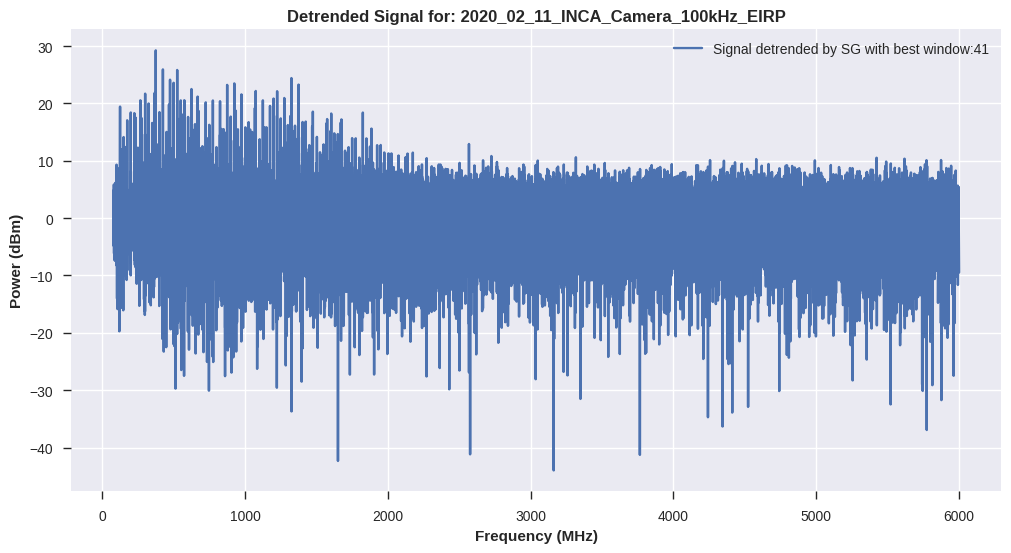

In [11]:
#Defines a function to compute the average prediction error across k folds for a given window length
def cv_error(y, x, window, polyorder, k=5):
    #Creates a KFold object that splits x and y into k random, equally sized parts.
    kf = KFold(k, shuffle=True, random_state=0)
    errs = []
    for train_idx, test_idx in kf.split(x):
        y_train, y_test = y[train_idx], y[test_idx]
        # smooth on train grid
        y_train_smooth = savgol_filter(y_train, window_length=window, polyorder=polyorder)
        # interpolate back to test x
        y_pred = np.interp(x[test_idx], x[train_idx], y_train_smooth)
        errs.append(np.mean((y_test - y_pred)**2))
    return np.mean(errs)

for instrument_name, df in dataframe_clean.items():
        
    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv


    print(f"CV‐optimal window for {instrument_name} is:", best_w_cv)

    plt.figure(figsize=(12,6))
    plt.plot(df['Frequency (MHz)'], detrend_cv, label='Signal detrended by SG with best window:'+str(best_w_cv))
    plt.tick_params(axis='both', which='both', direction='out', length=6, width=1)
    plt.title(f'Detrended Signal for: {instrument_name}', fontweight='bold')
    plt.legend(framealpha=1, facecolor='white')
    plt.xlabel('Frequency (MHz)', fontweight='bold')
    plt.ylabel('Power (dBm)', fontweight='bold')





# Detect the peaks

/tmp/ipykernel_7053/1920426796.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_7053/1920426796.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_7053/1920426796.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  pl

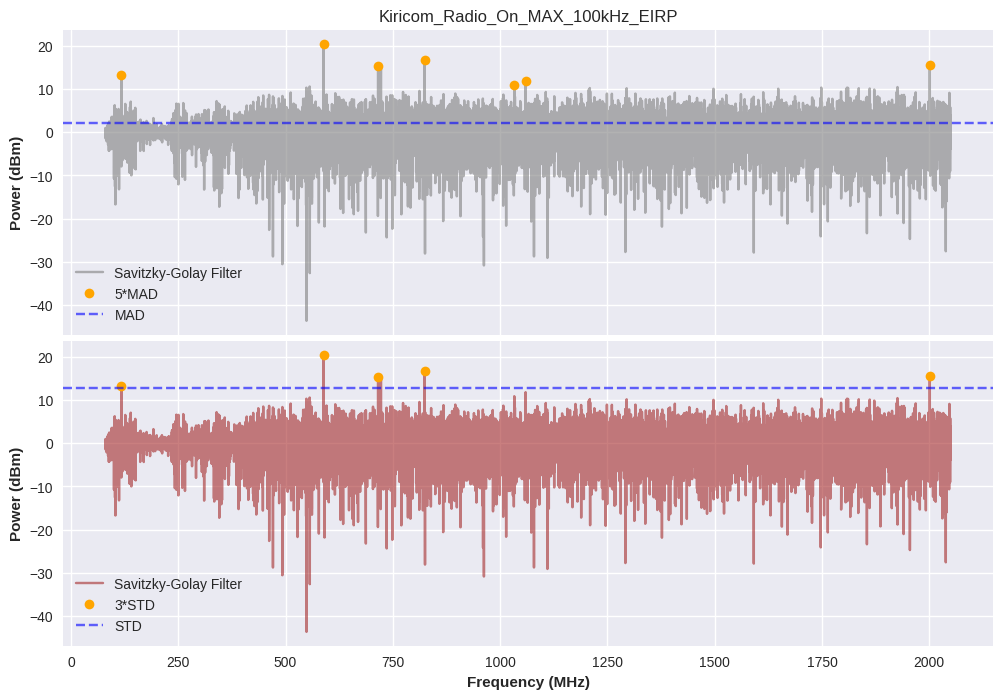

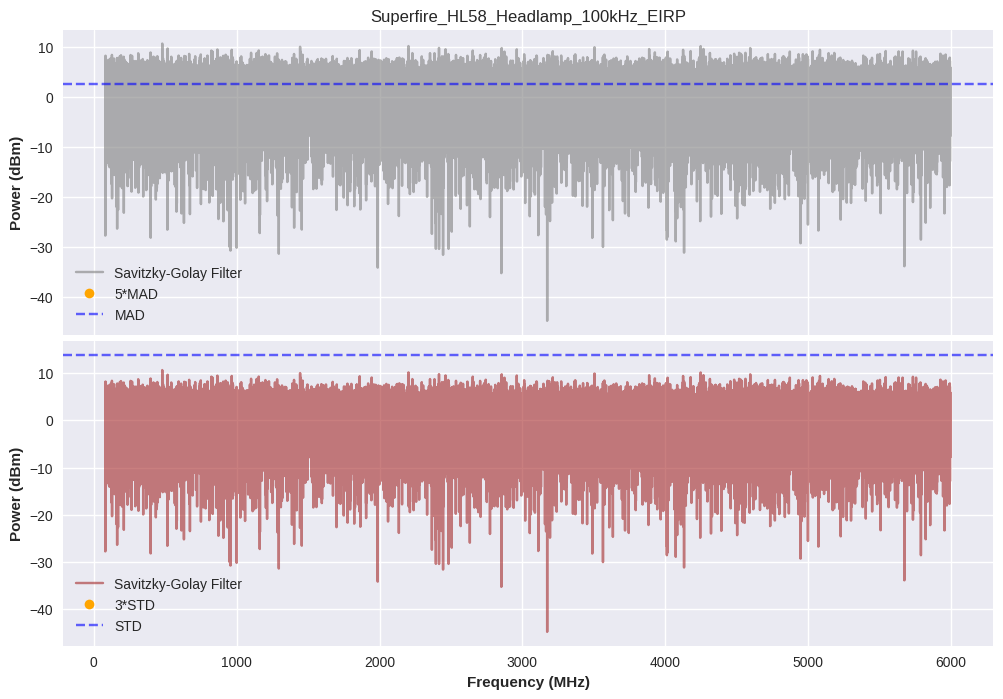

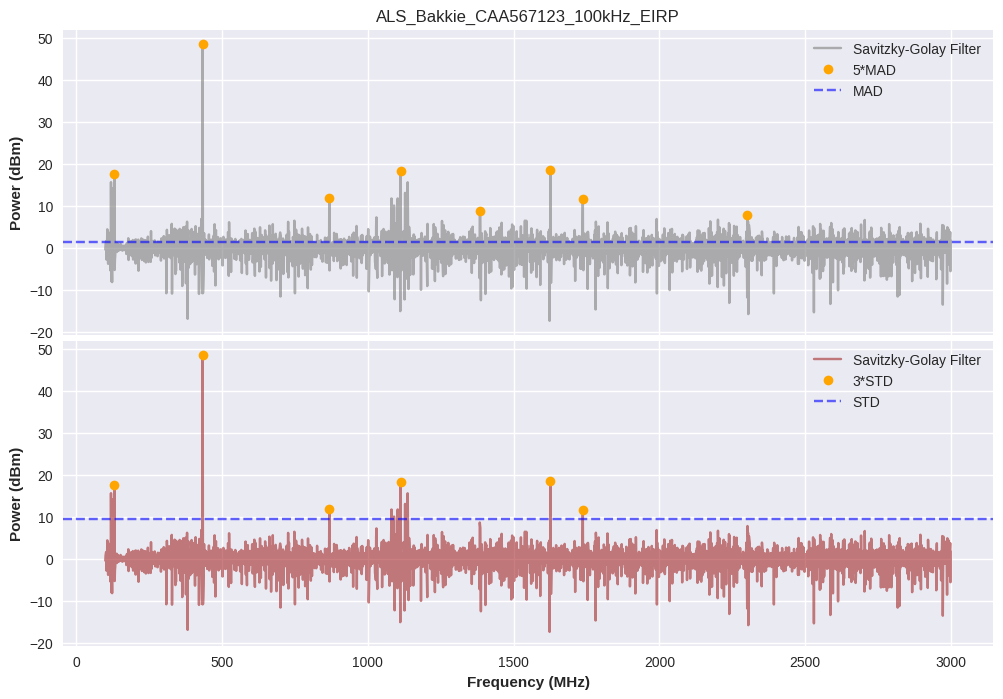

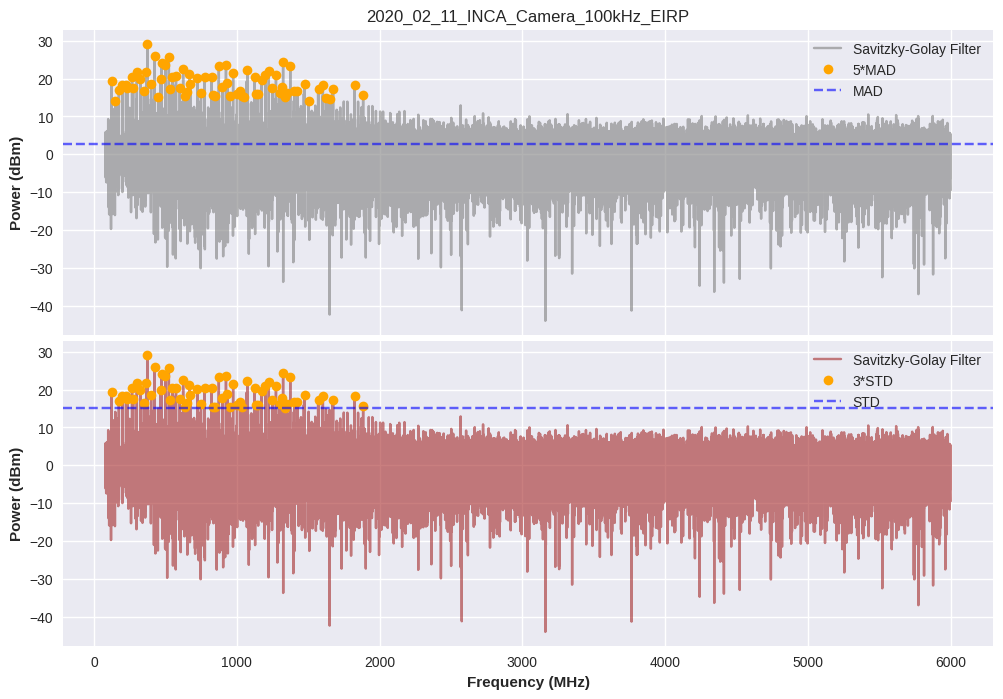

In [12]:
# deterine peaks using 3*sigma and 5*Median_Absolute_Deviation


def cv_error(y, x, window, polyorder, k=5):
    #Creates a KFold object that splits x and y into k random, equally sized parts.
    kf = KFold(k, shuffle=True, random_state=0)
    errs = []
    for train_idx, test_idx in kf.split(x):
        y_train, y_test = y[train_idx], y[test_idx]
        # smooth on train grid
        y_train_smooth = savgol_filter(y_train, window_length=window, polyorder=polyorder)
        # interpolate back to test x
        y_pred = np.interp(x[test_idx], x[train_idx], y_train_smooth)
        errs.append(np.mean((y_test - y_pred)**2))
    return np.mean(errs)

for instrument_name, df in dataframe_clean.items():
        
    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv


    # findd the peaks
    peaks_sg_MAD, _ = find_peaks(detrend_cv, 
                                height=5*MAD(detrend_cv),
                                prominence=10,
                                distance=50
                                )
    
        # findd the peaks
    peaks_sg_STD, _ = find_peaks(detrend_cv, 
                                height=3*np.std(detrend_cv),
                                prominence=10,
                                distance=50
                                )

    #plot 
    plt.style.use('seaborn')
    fig, axs = plt.subplots(2,1, figsize=(12,8))
    fig.subplots_adjust(hspace=0.02)


    axs[0].plot(df['Frequency (MHz)'], detrend_cv, color='gray', label= 'Savitzky-Golay Filter', alpha=0.6)
    axs[0].plot(df['Frequency (MHz)'].values[peaks_sg_MAD], detrend_cv.values[peaks_sg_MAD], 'o',color='orange', label="5*MAD")
    axs[0].axhline(y=MAD(detrend_cv), alpha=0.6, color='b', linestyle='--', label='MAD')
    axs[0].set_title(instrument_name)
    axs[0].set_ylabel('Power (dBm)', fontweight='bold')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(df['Frequency (MHz)'], detrend_cv, color='brown', label='Savitzky-Golay Filter', alpha=0.6)
    axs[1].plot(df['Frequency (MHz)'].values[peaks_sg_STD], detrend_cv.values[peaks_sg_STD], 'o', color='orange', label="3*STD")
    axs[1].axhline(y=3*np.std(detrend_cv), alpha=0.6, color='b', linestyle='--', label='STD')
    axs[1].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[1].set_ylabel('Power (dBm)',fontweight='bold')
    #axs[1].set_title(instrument_name)
    axs[1].legend()
    axs[1].grid(True)

## Determine Outlier 
Two rules for identifying outliers are:

* The standard deviation rule, useful when the data have an approximately symmetric distribution.
* The IQR rule, useful in other situations.



### Standard Deviation Rule
The 68 (mean + std), 95 (mean + 2*std) and 99.7(mean + 3* std), is apply for any bell-shaped distribution, approximately:

* 68% of observations lie within one standard deviation of the mean;
* 95% of observations lie within two standard deviations of the mean;
* 99.7% of observations lie within three standard deviations of the mean. 

Standard deviation rule for identifying outliers, for approximately symmetric distributions, an observation more than three standard deviations from the mean may be considered an outlier.



### The IQR rule for identifying outliers
Since the standard deviation rule for identifying outliers relies on the mean and standard deviation, it is not appropriate for non-symmetric distributions. Another rule is needed for identifying outliers in these situations: the IQR rule.

The IQR rule identifies mild and extreme outliers as:

* Extreme outliers: observations  3 × IQR more unusual than  Q1 or Q3.

* Mild outliers: observations  1.5 × IQR more unusual than Q1 or Q3 (that are not also extreme outliers).

## `Let's use the MAD with zscore (modiefiend)`

Instead of using the mean and standard deviation (like the standard Z-score), the modified Z-score uses the median and the median absolute deviation (MAD), which are much less sensitive to extreme values or skewed distributions.

<div style='text-align: center;'>
Mi = 0.6745×(xi−median(X))/MAD​
</div>


Here:
* xi - is the data point being examined;
* median(𝑋) - is the dataset's median;
* MAD = median(|𝑥𝑖 − median(𝑋)|);
* The factor 0.6745 scales MAD to approximate standard deviation under a normal distribution.



**Robustness**: Designed to resist distortion from skewed data or extreme values.

**Effective on small or noisy datasets**: More stable than mean-based metrics when outliers are present.
Number Analytics

**Default threshold**: Common practice flags values with ∣Mi∣>3.5 as potential outliers.


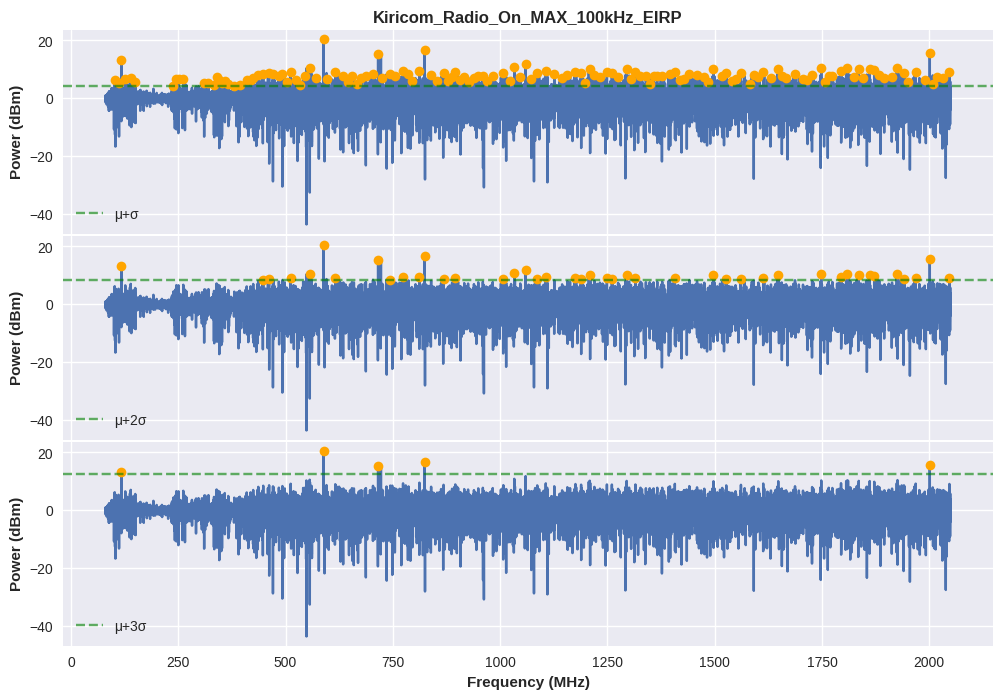

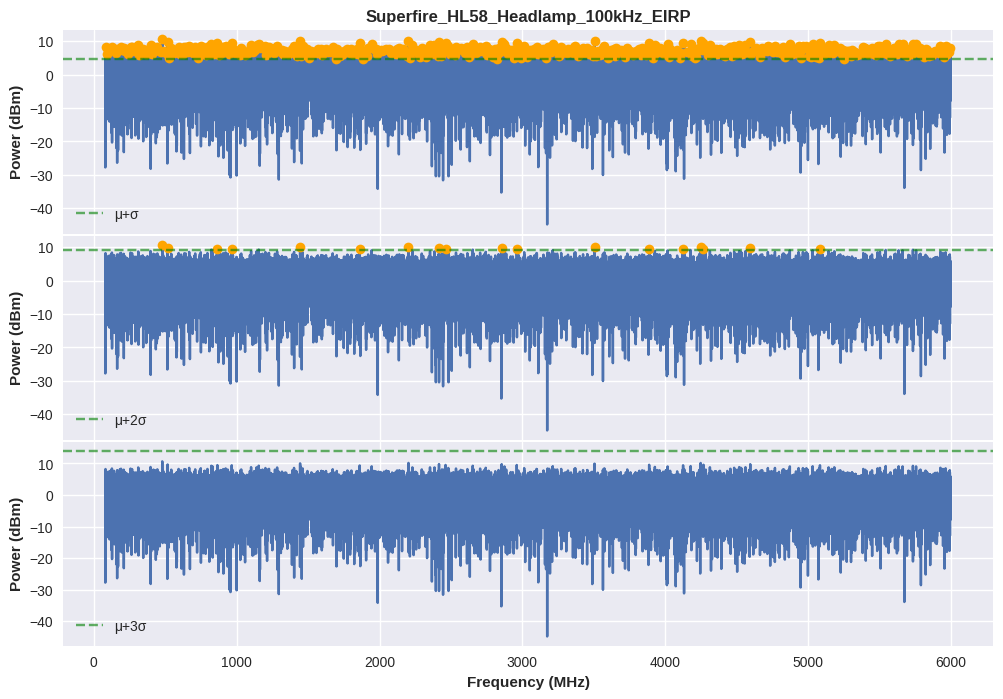

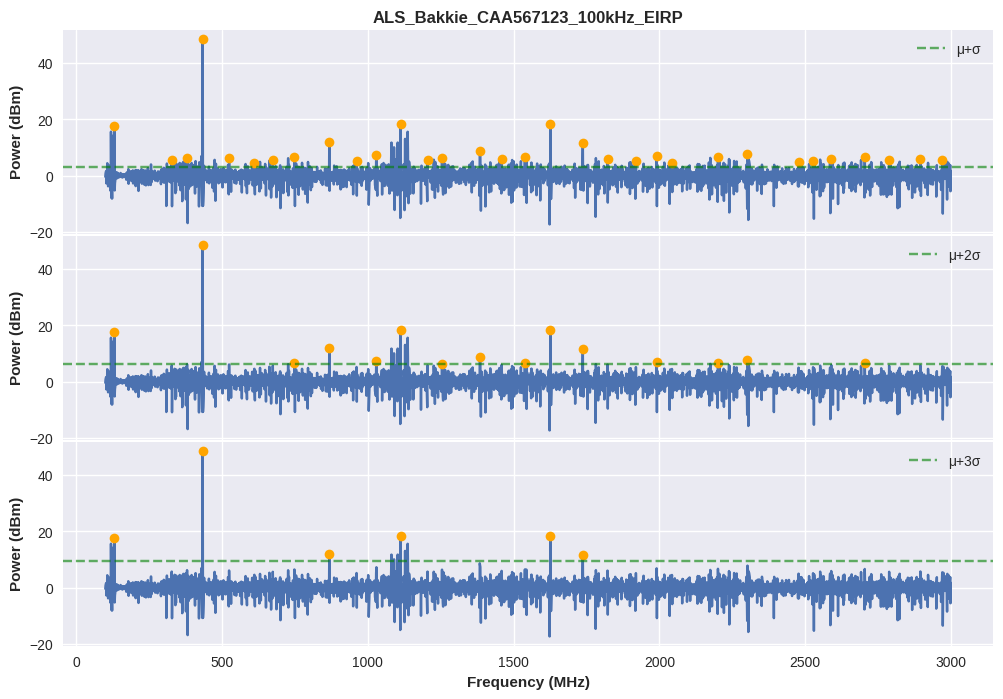

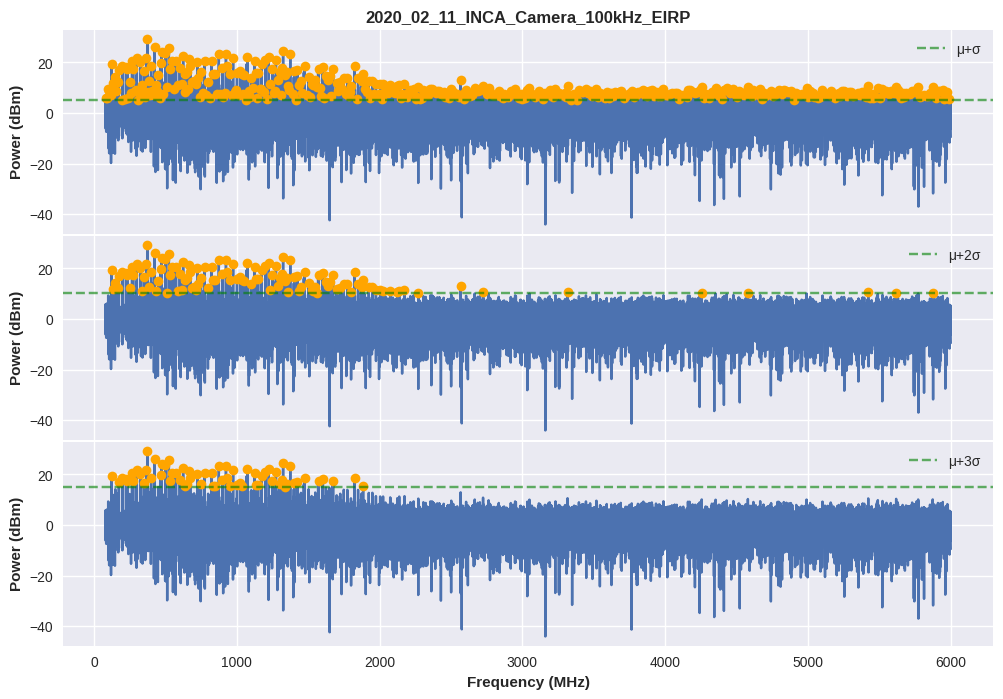

In [13]:
for instrument_name, df in dataframe_clean.items():

    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv

    
    peaks_std, _ = find_peaks(detrend_cv, height= np.mean(detrend_cv) + np.std(detrend_cv),
                             prominence=10,
                              distance= 50)
    
    peaks_2std, _ = find_peaks(detrend_cv, height=np.mean(detrend_cv) + 2*np.std(detrend_cv),
                              prominence=10,
                              distance=50)
    

    peaks_3std, _ = find_peaks(detrend_cv, height=np.mean(detrend_cv) + 3*np.std(detrend_cv),
                              prominence=10,
                              distance=50)
    

    fig, axs = plt.subplots(3,1, figsize=(12,8))
    fig.subplots_adjust(hspace=0.01)


    axs[0].plot(df['Frequency (MHz)'], detrend_cv)
    axs[0].plot(df['Frequency (MHz)'].values[peaks_std], detrend_cv.values[peaks_std], 'o', color='orange')
    axs[0].axhline(y=np.mean(detrend_cv) + np.std(detrend_cv), alpha=0.6, color='g', linestyle='--', label='μ+σ')
    axs[0].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[0].set_ylabel('Power (dBm)',fontweight='bold')
    axs[0].set_title(instrument_name, fontweight='bold')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(df['Frequency (MHz)'], detrend_cv)
    axs[1].plot(df['Frequency (MHz)'].values[peaks_2std], detrend_cv.values[peaks_2std], 'o', color='orange')
    axs[1].axhline(y=np.mean(detrend_cv) + 2*np.std(detrend_cv), alpha=0.6, color='g', linestyle='--', label='μ+2σ')
    axs[1].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[1].set_ylabel('Power (dBm)',fontweight='bold')
    axs[1].legend()
    axs[1].grid(True)

    axs[2].plot(df['Frequency (MHz)'], detrend_cv)
    axs[2].plot(df['Frequency (MHz)'].values[peaks_3std], detrend_cv.values[peaks_3std], 'o', color='orange')
    axs[2].axhline(y=np.mean(detrend_cv) + 3*np.std(detrend_cv), alpha=0.6, color='g', linestyle='--', label='μ+3σ')
    axs[2].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[2].set_ylabel('Power (dBm)',fontweight='bold')
    axs[2].legend()
    axs[2].grid(True)

    #break
    
    


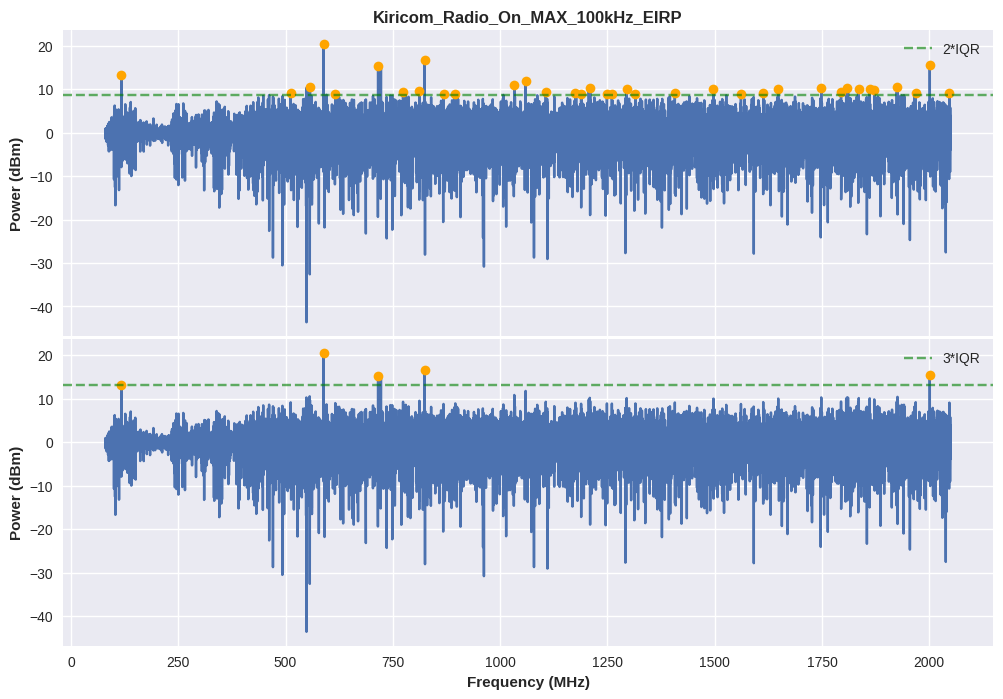

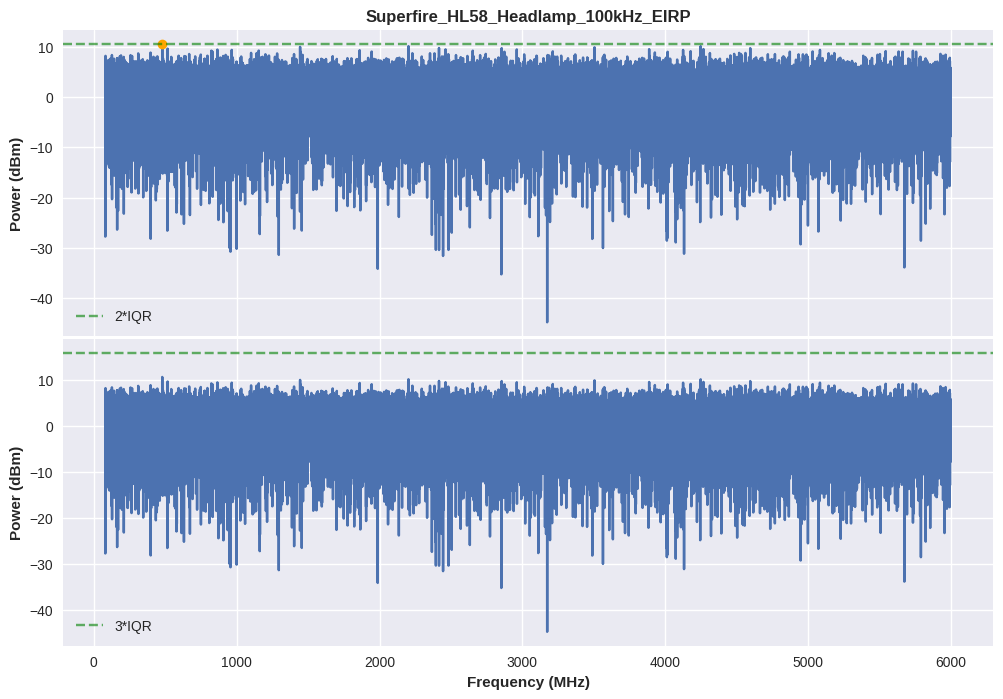

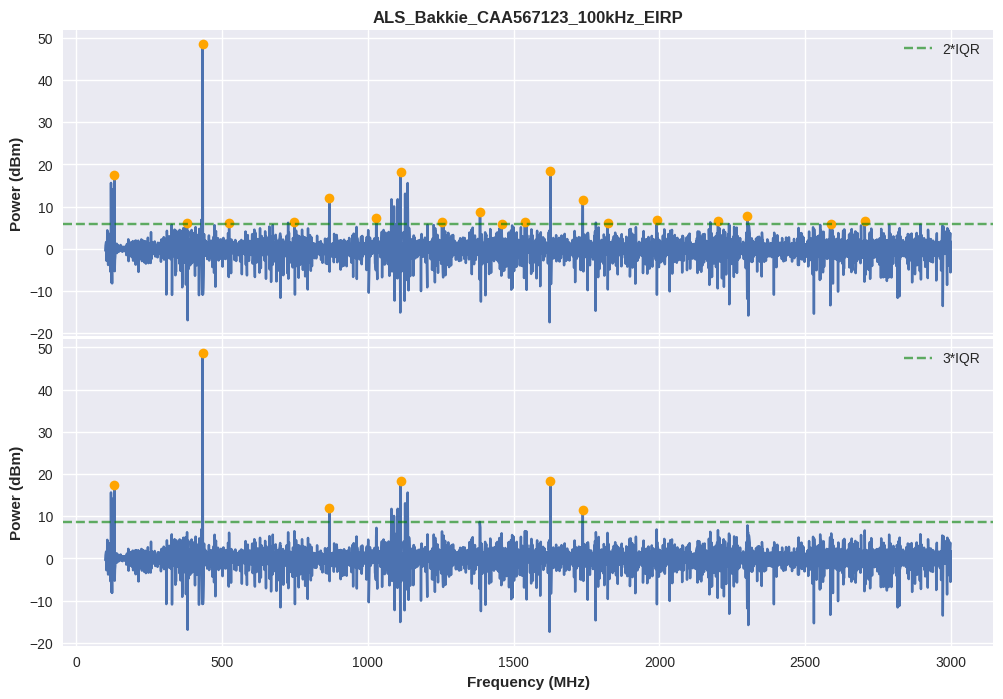

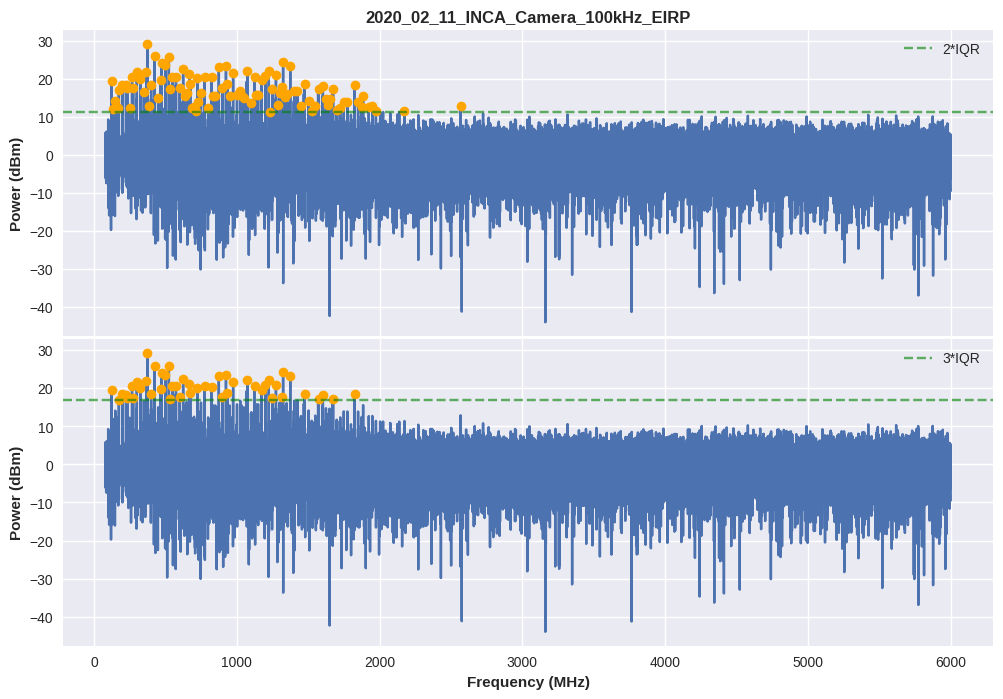

In [14]:
for instrument_name, df in dataframe_clean.items():

    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv

    # determine the Q1 and Q3
    q1 = np.percentile(detrend_cv, 25)
    q3 = np.percentile(detrend_cv, 75)
    iqr = q3 - q1


    peaks_2iqr, _ = find_peaks(detrend_cv, height= 2*iqr,
                             prominence=10,
                              distance= 50)

    peaks_3iqr, _ = find_peaks(detrend_cv, height= 3*iqr,
                             prominence=10,
                              distance= 50)
    

    fig, axs = plt.subplots(2,1, figsize=(12,8))
    fig.subplots_adjust(hspace=0.01)


    axs[0].plot(df['Frequency (MHz)'], detrend_cv)
    axs[0].plot(df['Frequency (MHz)'].values[peaks_2iqr], detrend_cv.values[peaks_2iqr], 'o', color='orange')
    axs[0].axhline(y=2*iqr, alpha=0.6, color='g', linestyle='--', label='2*IQR')
    axs[0].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[0].set_ylabel('Power (dBm)',fontweight='bold')
    axs[0].set_title(instrument_name, fontweight='bold')
    axs[0].legend()
    axs[0].grid(True)


    axs[1].plot(df['Frequency (MHz)'], detrend_cv)
    axs[1].plot(df['Frequency (MHz)'].values[peaks_3iqr], detrend_cv.values[peaks_3iqr], 'o', color='orange')
    axs[1].axhline(y=3*iqr, alpha=0.6, color='g', linestyle='--', label='3*IQR')
    axs[1].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[1].set_ylabel('Power (dBm)',fontweight='bold')
    axs[1].legend()
    axs[1].grid(True)

    

    


    

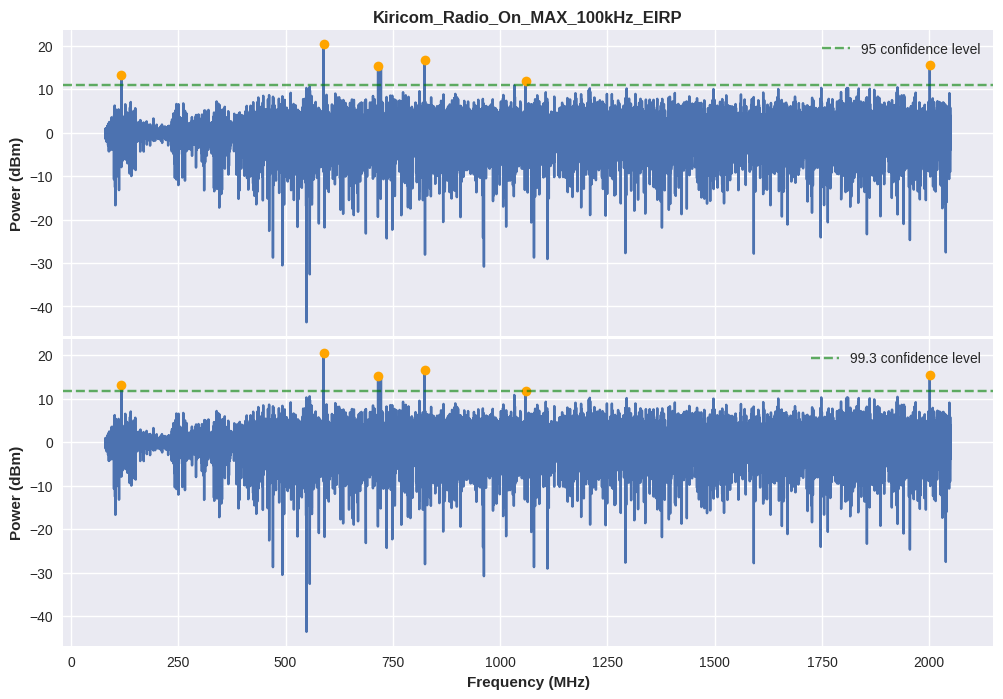

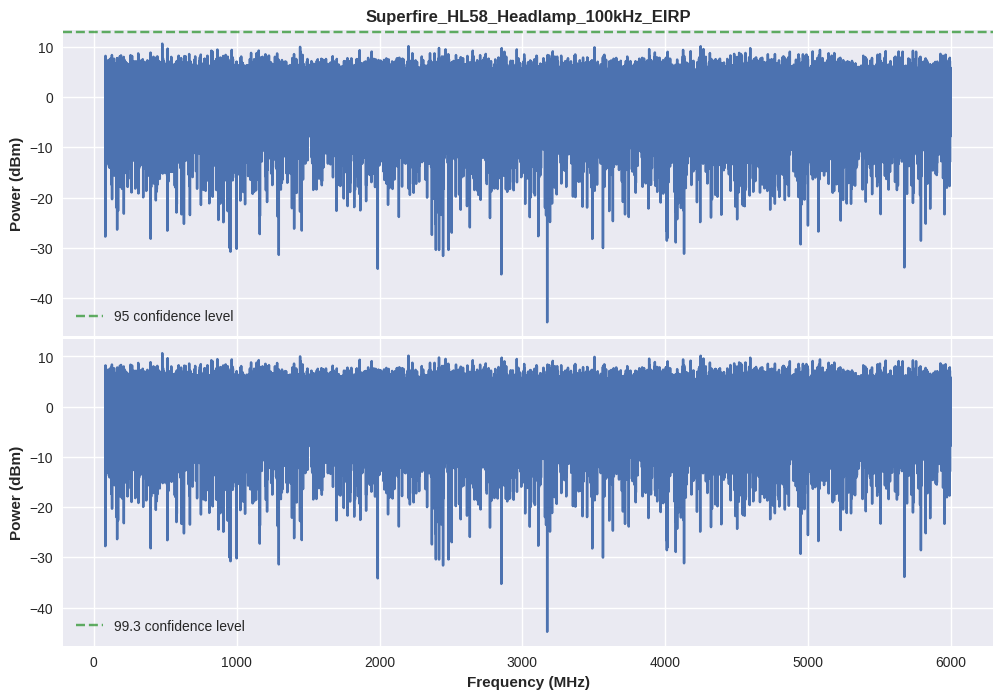

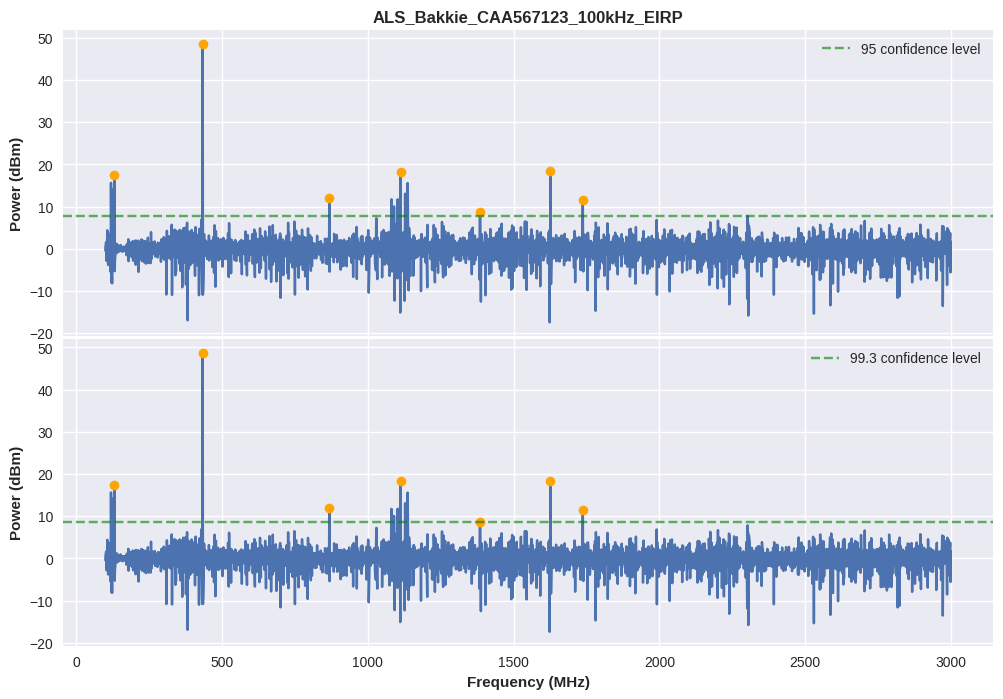

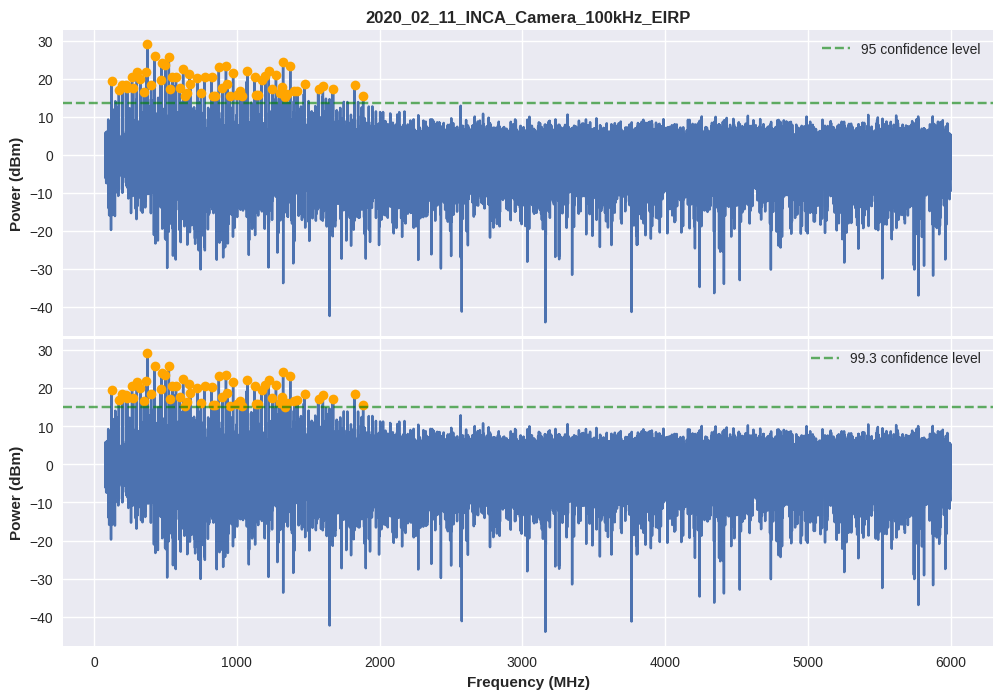

In [15]:
for instrument_name, df in dataframe_clean.items():

    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv

    # modified z score 
    mi = 0.6745*(detrend_cv-np.median(detrend_cv))/MAD(detrend_cv)
    #(99.3% interval confidence)
    outliers_99 = detrend_cv[mi>3.5].min()
    peaks_mzs_99, _ = find_peaks(detrend_cv, height= outliers_99,
                             prominence=10,
                              distance= 50)
    


    # (95.% interval confidence)
    outliers_95 = detrend_cv[mi>1.96].min()
    peaks_mzs_95, _ = find_peaks(detrend_cv, height= outliers_95,
                             prominence=10,
                              distance= 50)
    


    fig, axs = plt.subplots(2,1, figsize=(12,8))
    fig.subplots_adjust(hspace=0.01)


    axs[0].plot(df['Frequency (MHz)'], detrend_cv)
    axs[0].plot(df['Frequency (MHz)'].values[peaks_mzs_99], detrend_cv.values[peaks_mzs_99], 'o', color='orange')
    axs[0].axhline(y=outliers_95 + np.std(detrend_cv), alpha=0.6, color='g', linestyle='--', label='95 confidence level')
    axs[0].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[0].set_ylabel('Power (dBm)',fontweight='bold')
    axs[0].set_title(instrument_name, fontweight='bold')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(df['Frequency (MHz)'], detrend_cv)
    axs[1].plot(df['Frequency (MHz)'].values[peaks_mzs_99], detrend_cv.values[peaks_mzs_99], 'o', color='orange')
    axs[1].axhline(y=outliers_99, alpha=0.6, color='g', linestyle='--', label='99.3 confidence level')
    axs[1].set_xlabel('Frequency (MHz)', fontweight='bold')
    axs[1].set_ylabel('Power (dBm)',fontweight='bold')
    axs[1].legend()
    axs[1].grid(True)


    




# `Detecting the harmonic`

In [16]:

def detect_harmonics(freq, signal, max_harmonics=5):
    """
    Detect main emission and its harmonics from PSD data.

    Parameters
    ----------
    freq : array-like
        Frequency axis (MHz or Hz).
    signal : array-like
        Power values (dBm or linear scale).
    noise_margin : float
        dB above the noise floor required to count as a peak.
    max_harmonics : int
        Maximum harmonic order to check.
    """
    # 1) Estimate noise floor (median is more robust than mean)
    noise_floor = np.median(signal)
    
    # 2) Find all peaks
    peaks, props = find_peaks(signal, height=noise_floor)
    
    # 3) Main emission = highest peak
    main_peak_idx = peaks[np.argmax(signal[peaks])]
    main_freq = freq[main_peak_idx]
    
    harmonics_found = [(1, main_freq, signal[main_peak_idx])]
    
    # 4) Search for harmonics
    for n in range(2, max_harmonics + 1):
        target_freq = n * main_freq
        # find closest frequency bin to expected harmonic
        idx = np.argmin(np.abs(freq - target_freq))
        if signal[idx] > noise_floor:
            harmonics_found.append((n, freq[idx], signal[idx]))
    
    return harmonics_found, noise_floor


Noise floor: 0.43 dBm
Harmonic 1: 588.565 MHz, 20.49 dBm
Harmonic 2: 1177.142 MHz, 7.95 dBm
Harmonic 3: 1765.720 MHz, 7.24 dBm
Harmonic 4: 2049.972 MHz, 1.49 dBm
Harmonic 5: 2049.972 MHz, 1.49 dBm


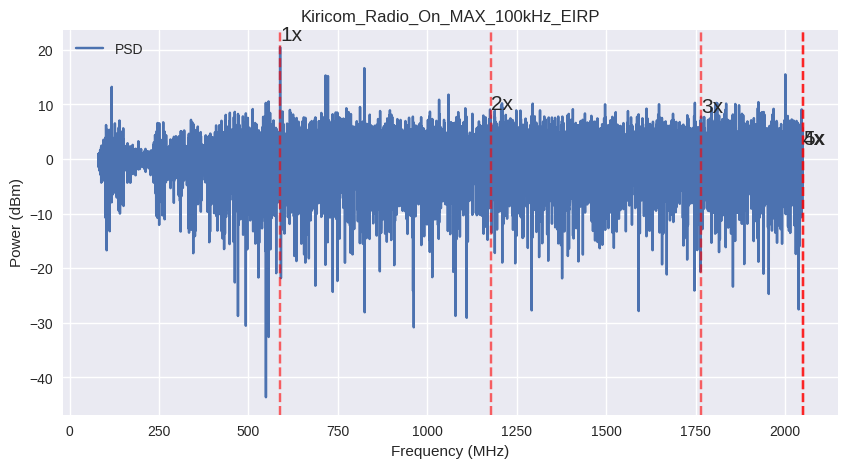

In [17]:
for instrument_name, df in dataframe_clean.items():


    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv


    # Example usage
    freq = df['Frequency (MHz)'].values
    psd = df['Clean_EIRP(dBm)'].values

    harmonics, noise_floor = detect_harmonics(df['Frequency (MHz)'], detrend_cv)

    print(f"Noise floor: {noise_floor:.2f} dBm")
    for order, f, p in harmonics:
        print(f"Harmonic {order}: {f:.3f} MHz, {p:.2f} dBm")

    # --- Optional plot ---
    plt.figure(figsize=(10,5))
    plt.plot(freq, detrend_cv, label='PSD')
    for order, f, p in harmonics:
        plt.axvline(f, color='r', linestyle='--', alpha=0.6)
        plt.text(f, p+0.5, f"{order}x", rotation=0, verticalalignment='bottom')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Power (dBm)')
    plt.title(instrument_name)
    plt.legend()
    plt.show()

    break


## Signal Distribution

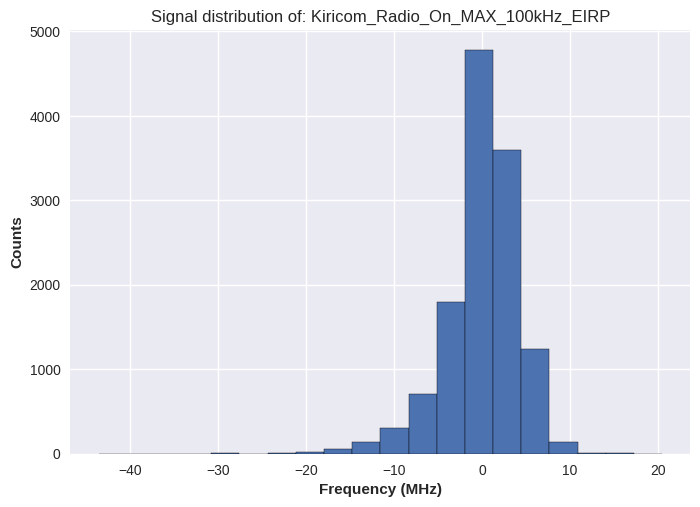

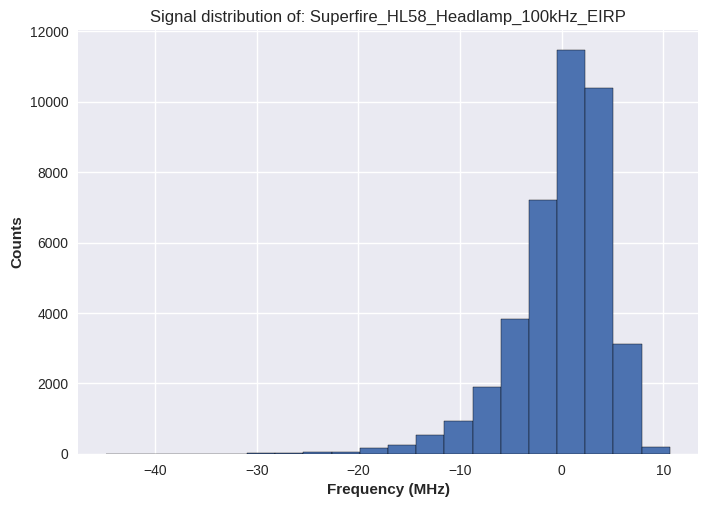

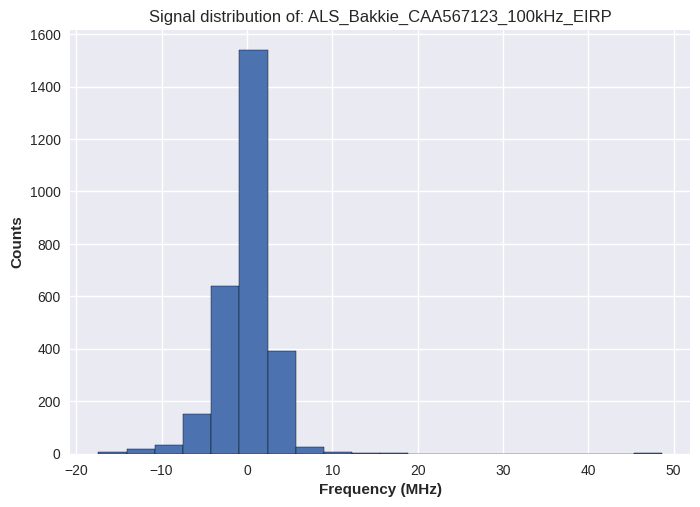

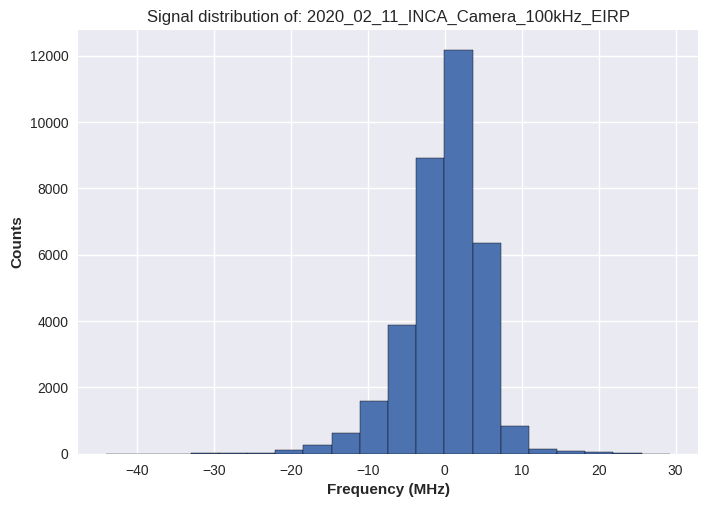

In [18]:
for instrument_name, df in dataframe_clean.items():

    windows = np.arange(11, 101, 10)
    polyorder=3
    cv_costs = [cv_error(df['Clean_EIRP(dBm)'], df['Frequency (MHz)'], w, polyorder) for w in windows]
    best_w_cv = windows[np.argmin(cv_costs)]

    trend_cv = savgol_filter(df['Clean_EIRP(dBm)'], window_length=best_w_cv, polyorder=polyorder)
    detrend_cv = df['Clean_EIRP(dBm)'] - trend_cv


    plt.hist(detrend_cv, bins=20, edgecolor="black")
    plt.title(f'Signal distribution of: {instrument_name}')
    plt.xlabel('Frequency (MHz)', fontweight='bold')
    plt.ylabel('Counts', fontweight='bold')
    plt.show()


## Appyl Fourier Transfor

-- The inverse Fourier transform is the mathematical operation that converts data from the frequency domain back into the time domain.

In [19]:
def inv_fou_tra (frequency, signal):

        
    #1) convert the signal from log scale to linear
    P_mW = 10**(signal / 10)  # mW
    P_w = P_mW / 1000 # W


    #2) determine the frequency rate
    freqs = np.array(frequency)* 1e6 #convert from MHz to Hz
    dfreqs = freqs[1]-freqs[0]
    M = len(freqs)             # number of one-sided bins (rfft length)
    N = 2*(M - 1)                 # time-domain length
    fs = N * dfreqs                  # sampling rate (Hz)
    t = np.arange(N) / fs


    # 3) magnitude and phase 
    mag = np.sqrt(P_w)
    phase = np.random.uniform(0, 1*np.pi, size = mag.shape)
    phase[0] = 0.0

    if N % 2 ==0.0:
        phase[-1]=0.0

    
    spec_one_sided = mag * np.exp(1j * phase)

    # --- 4) inverse real FFT ---
    
    x_time = np.fft.irfft(spec_one_sided, n=N)   # real time-series

    return x_time, t




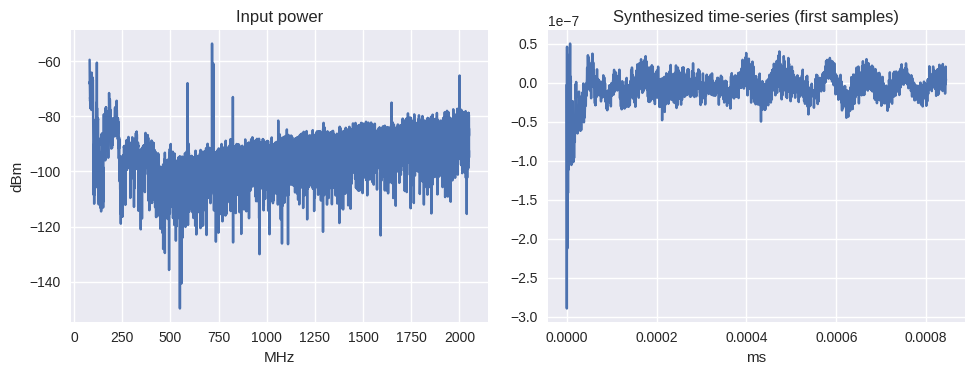

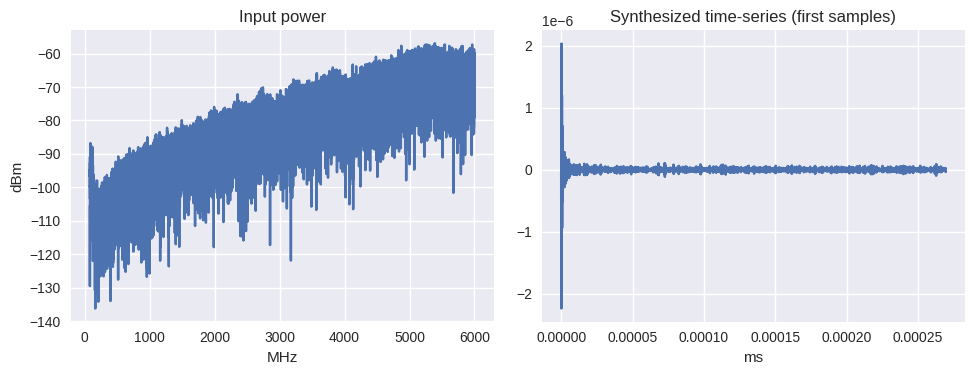

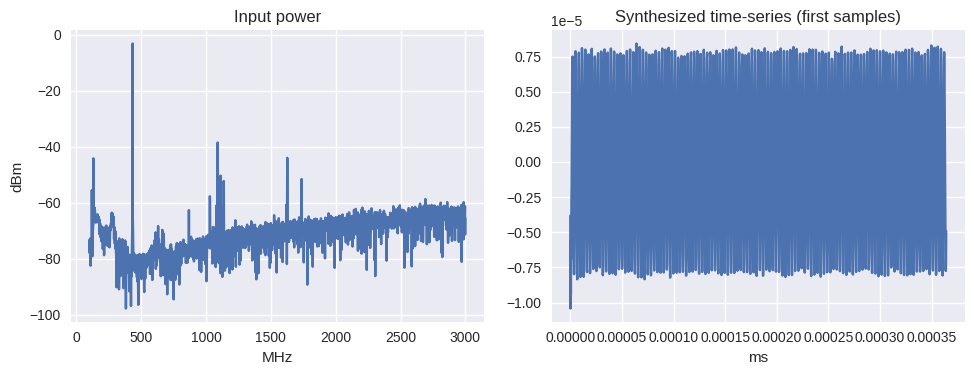

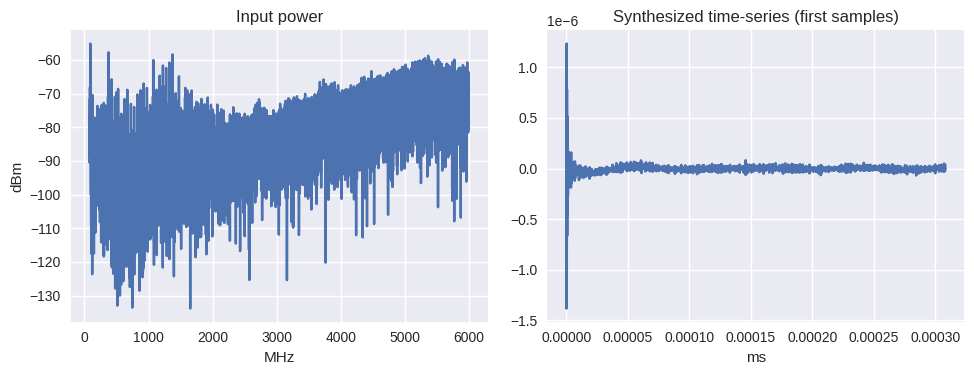

In [20]:
for instrument_name, df in dataframe_clean.items():
     #1) convert the signal from log scale to linear
    P_mW = 10**(df['Clean_EIRP(dBm)'] / 10)  # mW
    P_w = P_mW / 1000 # W


    #2) determine the frequency rate
    freqs = np.array(df['Frequency (MHz)']) * 1e6
    dfreq = freqs[1] - freqs[0]   # scalar bin width
    M = len(freqs)            # number of one-sided bins (rfft length)
    N = 2*(M - 1)                 # time-domain length
    fs = N * dfreq                 # sampling rate (Hz)
    t = np.arange(N) / fs


    # 3) magnitude and phase 

    mag = np.sqrt(P_w)
    phase = np.random.uniform(0, 1*np.pi, size = mag.shape)
    phase[0] = 0.0

    if N % 2 ==0.0:
        phase[-1]=0.0

    
    spec_one_sided = mag * np.exp(1j * phase)

    # --- 4) inverse real FFT ---
    x_time = np.fft.irfft(spec_one_sided, n=N)   # real time-series

    # --- 5) quick plots ---
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(df['Frequency (MHz)'], df['Clean_EIRP(dBm)']); plt.xlabel('MHz'); plt.ylabel('dBm'); plt.title('Input power')
    plt.subplot(1,2,2)
    plt.plot(t[:2000]*1e3, x_time[:2000]); plt.xlabel('ms'); plt.title('Synthesized time-series (first samples)')
    plt.tight_layout(); plt.show()


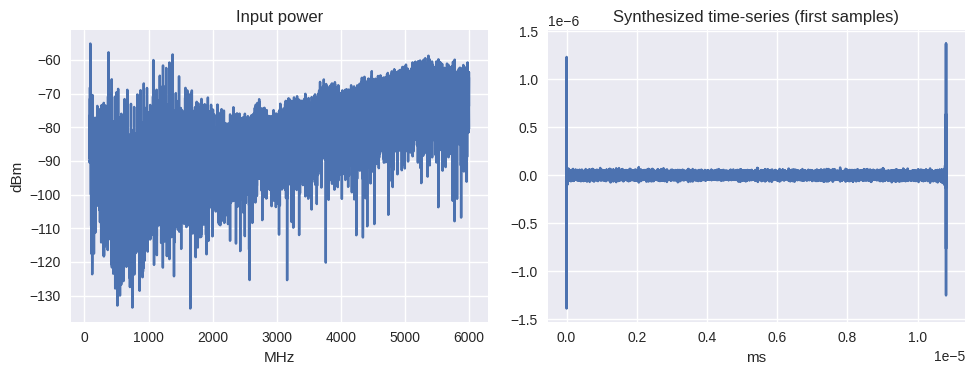

In [21]:
x_time, t = inv_fou_tra(df['Frequency (MHz)'], df['Clean_EIRP(dBm)'])

# --- 5) quick plots ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df['Frequency (MHz)'], df['Clean_EIRP(dBm)']); plt.xlabel('MHz'); plt.ylabel('dBm'); plt.title('Input power')
plt.subplot(1,2,2)
plt.plot(t, x_time); plt.xlabel('ms'); plt.title('Synthesized time-series (first samples)')
plt.tight_layout(); plt.show()


# Statitical Analysis befero and after detrending
